In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('ObesityDataSet_raw_and_data_sinthetic.csv')

In [3]:
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
print("Shape of data :" , df.shape)

Shape of data : (2111, 17)


In [5]:
# check null values
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [6]:
#check duplicate rows
df.duplicated().sum()

24

In [7]:
# drop duplicated rows
df.drop_duplicates(inplace=True)

In [8]:
df.describe().T #statistical desr

,count,mean,std,min,25%,50%,75%,max
Age,2087.0,24.353090,6.368801,14.00,19.915937,22.847618,26.000000,61.00
Height,2087.0,1.702674,0.093186,1.45,1.630178,1.701584,1.769491,1.98
Weight,2087.0,86.858730,26.190847,39.00,66.000000,83.101100,108.015907,173.00
FCVC,2087.0,2.421466,0.534737,1.00,2.000000,2.396265,3.000000,3.00
NCP,2087.0,2.701179,0.764614,1.00,2.697467,3.000000,3.000000,4.00
CH2O,2087.0,2.004749,0.608284,1.00,1.590922,2.000000,2.466193,3.00
FAF,2087.0,1.012812,0.853475,0.00,0.124505,1.000000,1.678102,3.00
TUE,2087.0,0.663035,0.608153,0.00,0.000000,0.630866,1.000000,2.00


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2087 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2087 non-null   object 
 1   Age                             2087 non-null   float64
 2   Height                          2087 non-null   float64
 3   Weight                          2087 non-null   float64
 4   family_history_with_overweight  2087 non-null   object 
 5   FAVC                            2087 non-null   object 
 6   FCVC                            2087 non-null   float64
 7   NCP                             2087 non-null   float64
 8   CAEC                            2087 non-null   object 
 9   SMOKE                           2087 non-null   object 
 10  CH2O                            2087 non-null   float64
 11  SCC                             2087 non-null   object 
 12  FAF                             20

In [10]:
df.select_dtypes(include='object').columns

Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [11]:
num_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
cat_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE','SCC', 'CALC', 'MTRANS']

In [12]:
for column in num_cols:
    print(df[column].value_counts())
    print('\n')


18.000000    126
26.000000    101
23.000000     89
21.000000     78
19.000000     59
            ... 
23.320120      1
34.243146      1
18.549437      1
36.310292      1
23.664709      1
Name: Age, Length: 1402, dtype: int64


1.700000    60
1.650000    50
1.600000    43
1.750000    39
1.800000    28
            ..
1.842943     1
1.706082     1
1.704141     1
1.705813     1
1.738836     1
Name: Height, Length: 1574, dtype: int64


80.000000     59
50.000000     42
75.000000     39
60.000000     37
70.000000     29
              ..
65.140408      1
87.279890      1
67.083121      1
90.138680      1
133.472641     1
Name: Weight, Length: 1525, dtype: int64


3.000000    647
2.000000    581
1.000000     33
2.823179      2
2.214980      2
           ... 
2.927409      1
2.706134      1
2.010684      1
2.300408      1
2.680375      1
Name: FCVC, Length: 810, dtype: int64


3.000000    1199
1.000000     179
4.000000      69
2.776840       2
3.985442       2
            ... 
3.054899       1


In [13]:
for column in cat_cols:
    print(df[column].value_counts())
    print('\n')

Male      1052
Female    1035
Name: Gender, dtype: int64


yes    1722
no      365
Name: family_history_with_overweight, dtype: int64


yes    1844
no      243
Name: FAVC, dtype: int64


Sometimes     1761
Frequently     236
Always          53
no              37
Name: CAEC, dtype: int64


no     2043
yes      44
Name: SMOKE, dtype: int64


no     1991
yes      96
Name: SCC, dtype: int64


Sometimes     1380
no             636
Frequently      70
Always           1
Name: CALC, dtype: int64


Public_Transportation    1558
Automobile                456
Walking                    55
Motorbike                  11
Bike                        7
Name: MTRANS, dtype: int64




C:\Users\miqba\AppData\Local\Temp\ipykernel_9756\2600054627.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


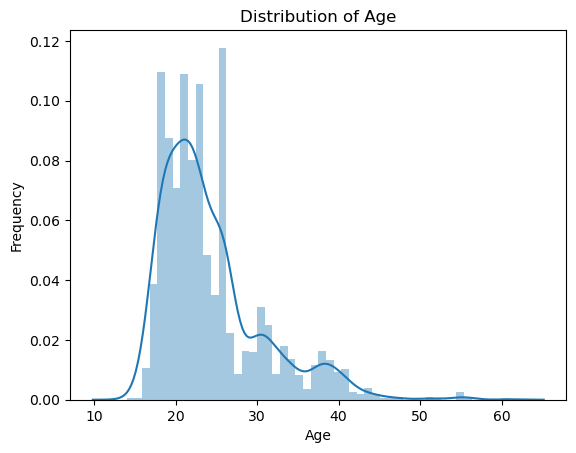

C:\Users\miqba\AppData\Local\Temp\ipykernel_9756\2600054627.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


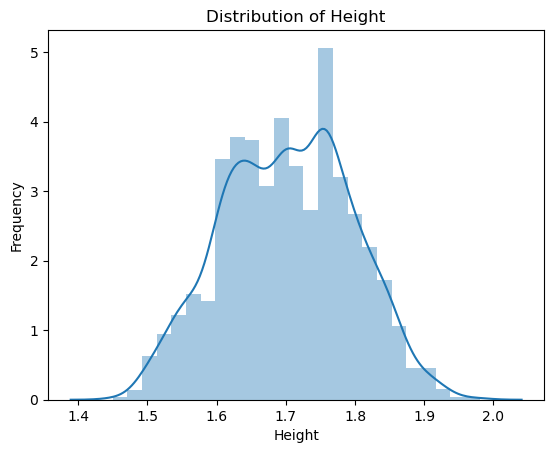

C:\Users\miqba\AppData\Local\Temp\ipykernel_9756\2600054627.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


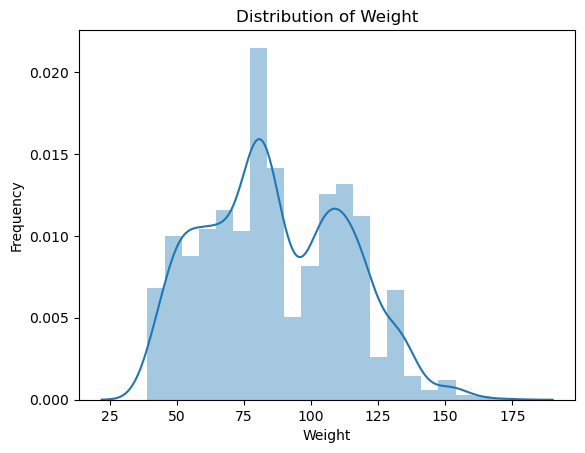

C:\Users\miqba\AppData\Local\Temp\ipykernel_9756\2600054627.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


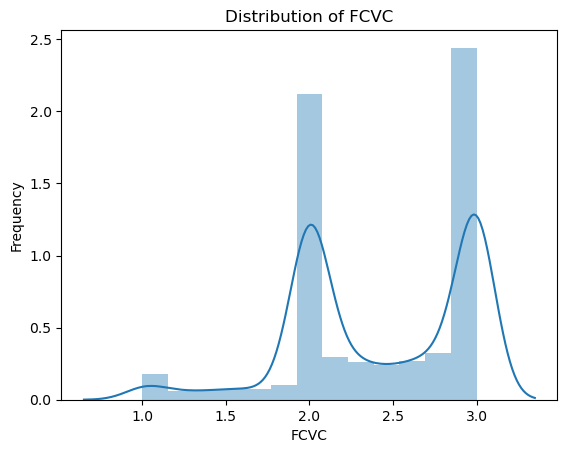

C:\Users\miqba\AppData\Local\Temp\ipykernel_9756\2600054627.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


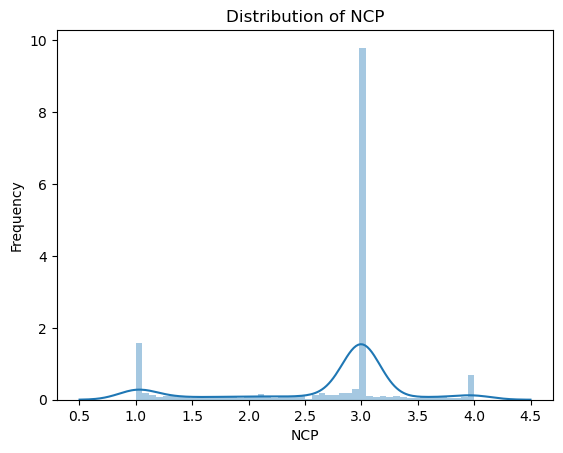

C:\Users\miqba\AppData\Local\Temp\ipykernel_9756\2600054627.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


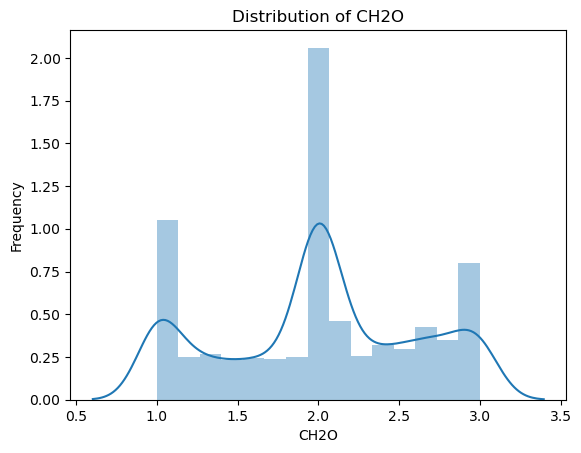

C:\Users\miqba\AppData\Local\Temp\ipykernel_9756\2600054627.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


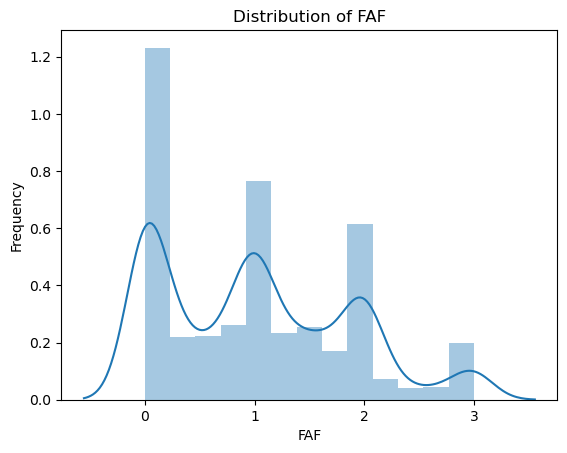

C:\Users\miqba\AppData\Local\Temp\ipykernel_9756\2600054627.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[column])


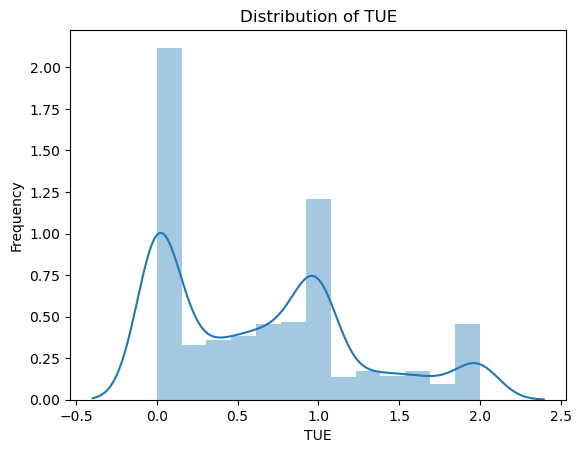

In [14]:
# Distribution in numerical columns
for column in num_cols:
    sns.distplot(df[column])
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

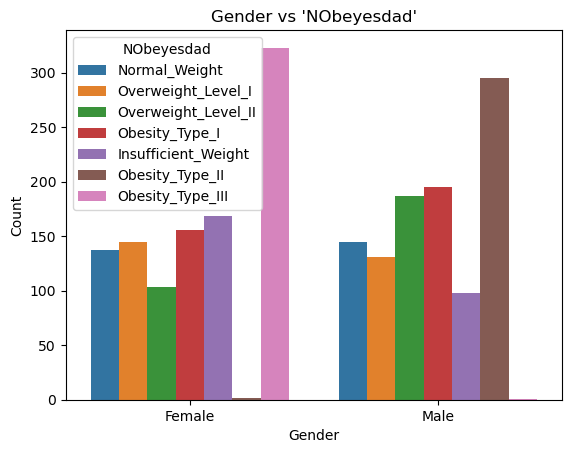

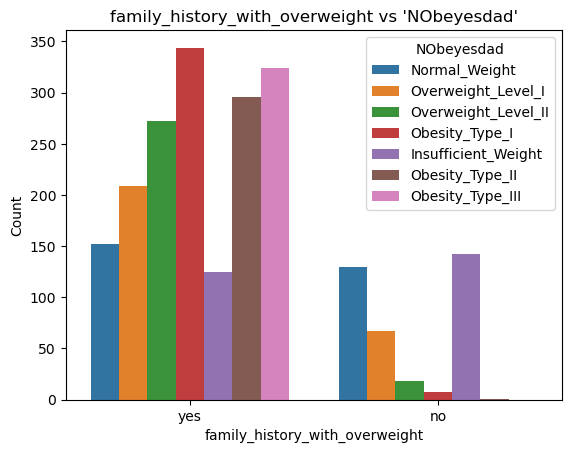

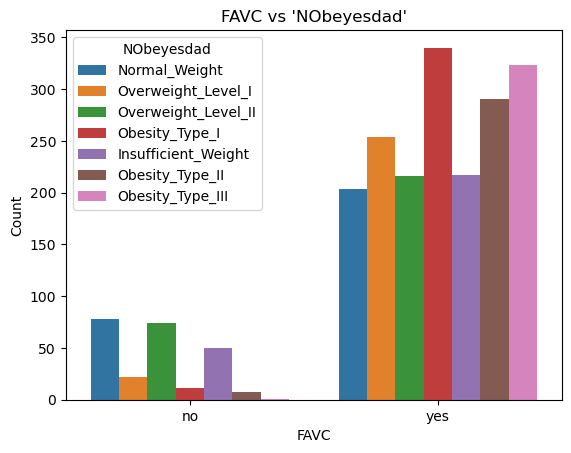

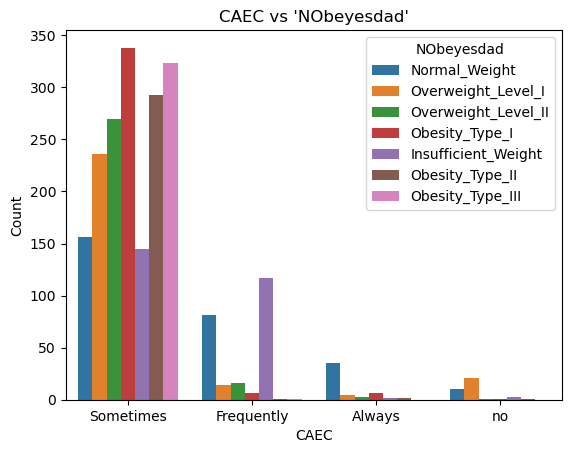

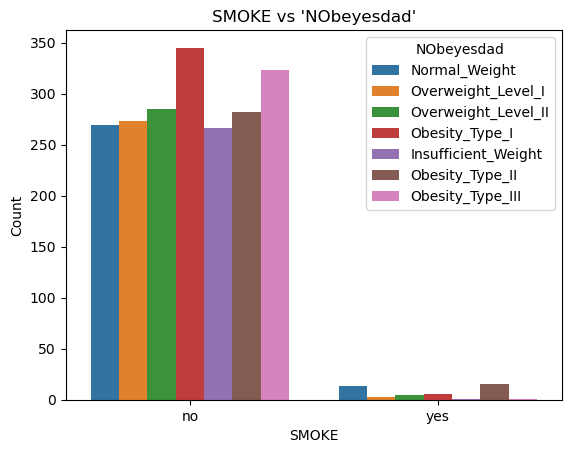

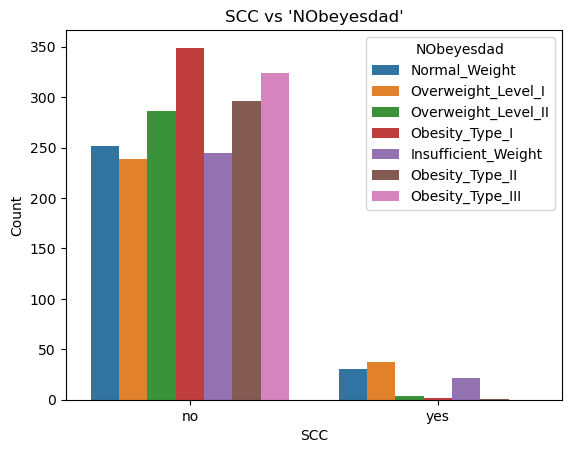

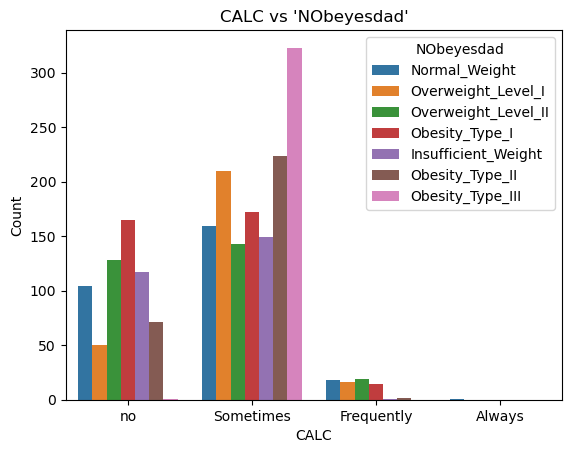

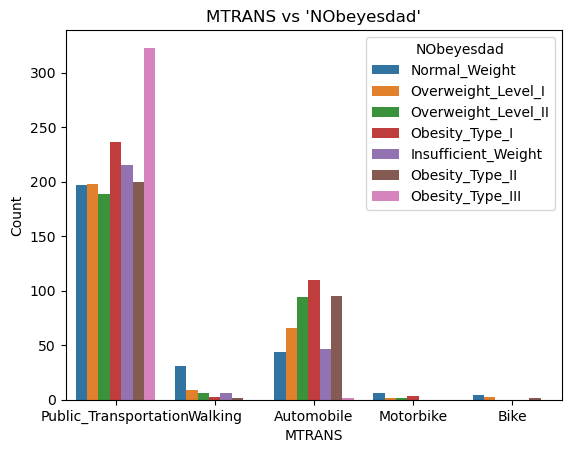

In [18]:
for column in cat_cols:
    sns.countplot(data=df, x= column, hue = df['NObeyesdad'])
    plt.title(f"{column} vs 'NObeyesdad'")
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.show()

C:\Users\miqba\AppData\Local\Temp\ipykernel_9756\2913983363.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),cmap='viridis',annot=True)


<Axes: >

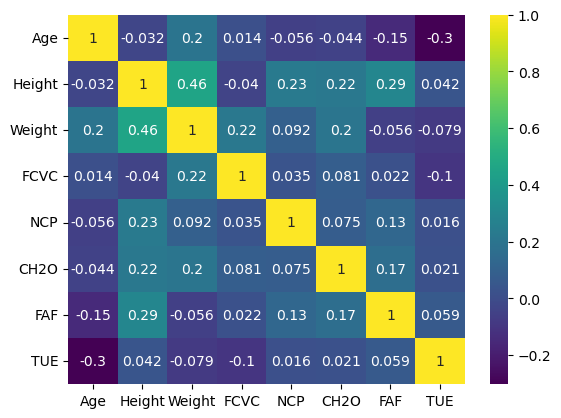

In [29]:
sns.heatmap(df.corr(),cmap='viridis',annot=True)

In [26]:
df.corr()

C:\Users\miqba\AppData\Local\Temp\ipykernel_9756\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
Age,1.000000,-0.031748,0.198160,0.013572,-0.055823,-0.044058,-0.148202,-0.302927
Height,-0.031748,1.000000,0.457468,-0.040363,0.227806,0.220487,0.293584,0.041808
Weight,0.198160,0.457468,1.000000,0.216574,0.092149,0.203823,-0.056490,-0.079351
FCVC,0.013572,-0.040363,0.216574,1.000000,0.034885,0.081332,0.022003,-0.104128
NCP,-0.055823,0.227806,0.092149,0.034885,1.000000,0.075335,0.127816,0.015693
CH2O,-0.044058,0.220487,0.203823,0.081332,0.075335,1.000000,0.165310,0.020704
FAF,-0.148202,0.293584,-0.056490,0.022003,0.127816,0.165310,1.000000,0.058716
TUE,-0.302927,0.041808,-0.079351,-0.104128,0.015693,0.020704,0.058716,1.000000


In [19]:
df['NObeyesdad'].value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_II    290
Normal_Weight          282
Overweight_Level_I     276
Insufficient_Weight    267
Name: NObeyesdad, dtype: int64

Data is balanced

In [20]:
# Mapping target columns
map_target = {'Obesity_Type_I': 'Obesity',
             'Obesity_Type_II': 'Obesity',
             'Obesity_Type_III': 'Extreme_Obesity',
             'Overweight_Level_I':'Overweight',
             'Overweight_Level_II':'Overweight',
             'Normal_Weight':'Normal',
             'Insufficient_Weight':'Underweight'}

In [23]:
df['NObeyesdad'] = df['NObeyesdad'].map(map_target)

In [24]:
df['NObeyesdad'].value_counts()

Obesity            648
Overweight         566
Extreme_Obesity    324
Normal             282
Underweight        267
Name: NObeyesdad, dtype: int64

In [31]:
# percentage of each category
df['NObeyesdad'].value_counts()/len(df['NObeyesdad'])*100

Obesity            31.049353
Overweight         27.120268
Extreme_Obesity    15.524677
Normal             13.512218
Underweight        12.793483
Name: NObeyesdad, dtype: float64

### After applying maping data become imbalnced